<a href="https://colab.research.google.com/github/a1coderxt/a1coderxt/blob/main/02_Neural_Network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Neural Network Classification with PyTorch

classification is a problem of predicting whether soething is one thing or anoter(there can be multiple things as an option)


### 1. Make classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles

X , y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [3]:
len(X) , len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X : {X[:5]}")
print(f"First 5 samples of y : {y[:5]}")

First 5 samples of X : [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y : [1 1 1 1 0]


In [5]:
# make a data frame

import pandas as pd
circles = pd.DataFrame({"X1": X[: , 0],
                        "X2": X[:, 1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


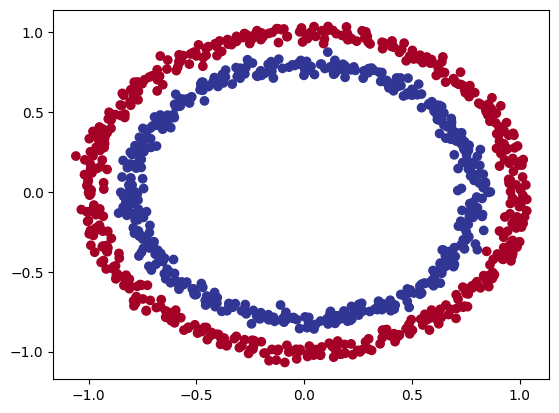

In [6]:
# visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

Note : The data we are working with often refered to as a oy dataset,
a dataset that is small enough to experiment but stilll sizeable enough to practice the fundamentals.

### 1.1 Check Input and Output shapes


In [7]:
X.shape , y.shape

((1000, 2), (1000,))

In [8]:
# View the first example of featuer and label

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X:{X_sample} and same for y : {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and same for the y :{y_sample.shape}")

Values for one sample of X:[0.75424625 0.23148074] and same for y : 1
Shapes for one sample of X: (2,) and same for the y :()


### 1.2 Turn the data into Tensor and create train and test split

In [9]:
import torch
import numpy as np
torch.__version__

'2.6.0+cu124'

In [10]:
#Turn data into tenosr
if isinstance(X , np.ndarray):
  X = torch.from_numpy(X).type(torch.float)
  y = torch.from_numpy(y).type(torch.float)

X[:5] , y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
type(X)

torch.Tensor

In [12]:
 # Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2, random_state=42)


In [13]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(800, 200, 800, 200)

## 2 Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:

1. Setup device agnostic code so our code will run on an accelerator **GPU**
if there is avaliable
2. Construct the model (by Subclassing `nn.Module`)
3. Define Loss function and Optimizer
4. Create a train and test loop

In [14]:
# Import pytorch and nn
import torch
from torch import  nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

Lets' create a model that :

1. Subclasses `nn.Module` (ALmost all the model in PyTorch subclass `nn.Module`
2. Cretae `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `Forward()` method that outline the forward pass (or forward computation)
4. Initiate an instance of our model class and sent it to the target `device`

In [15]:
# # 1. Consturct the model with nn.Module

class  CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capables of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2 , out_features=5)  # upscaling to 5 feauture help to learn better
    self.layer_2 = nn.Linear(in_features=5 , out_features=1)  # takes 5 feature and give 1 output

  # define the forwar method
  def forward(self,x):
    return self._layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output


# INstantiate an instance of our model

model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
next(model_0.parameters()).device

device(type='cpu')

In [17]:
# Lets' replicate the model above using nn.Sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2 , out_features=5),
    nn.Linear(in_features=5 , out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3814,  0.6491],
                      [ 0.1482, -0.0859],
                      [-0.5313,  0.5792],
                      [-0.6374, -0.0745],
                      [ 0.0412, -0.0103]])),
             ('0.bias', tensor([ 0.2548, -0.1240, -0.2581, -0.5062, -0.4290])),
             ('1.weight',
              tensor([[-0.3271,  0.3170,  0.2972, -0.0170,  0.0220]])),
             ('1.bias', tensor([-0.1226]))])

In [19]:
## Make some predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions : {len(untrained_preds)} , Shape : {untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)} , Shape : {X_test.shape}")
print(f"\nFirst 10 predictions: \n {untrained_preds[:10]}")
print(f"\nFirst 10 labels: \n {y_test[:10]}")

Length of predictions : 200 , Shape : torch.Size([200, 1])
Length of test samples : 200 , Shape : torch.Size([200, 2])

First 10 predictions: 
 tensor([[-0.2841],
        [-0.3899],
        [-0.1445],
        [-0.3230],
        [-0.3636],
        [-0.4265],
        [-0.5510],
        [-0.5601],
        [-0.1355],
        [-0.3994]])

First 10 labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

which loss function or optimizer should you use ?

Again... this is problem specific.

For example for the regression you might want MAE OR MSE

For classification you might want binary cross entropy or categorical entropy (cross entropy)

As a reminder the Loss function measure how **wrong** your model predictions are

And for optimizers , two of the most common and useful are SGD and Adam


* For the loss function we are going to use  `torch.nn.BECWithLogitsLoss()` or BCE

* For a defination on what a logit is in deep learning

* For deffrent optimizer see `torch.optim`

In [20]:
# Setup the loss funtion
# loss_fn = BCELoss() # it requires inputs to have gone through the sigmoid activation function prior to input to BCELoss


# this version is more **numerically stable** than using a plain Sigmoid followed by a BCELoss
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                      lr=0.1)



In [21]:
# calculate the accuracy - out of 100 examples , what percentage does our model get right?

def accuracy_fn(y_true , y_preds):
  correct = torch.eq(y_true, y_preds).sum().item()
  acc = (correct/len(y_preds)) * 100
  return acc

## Train model

To train the model we are going to need to build training loop
1. Forward pass
2. Calculate the loss
3. Optimizer Zero rad
4. Loss backward (backpropogation)
5. Optimizer step (gradient descent)


### 3.1 Going from rae logits -> prediction probabilities -> prediction tables

Our model ouputs are going to be raw **Logits**

We can convert these **Logits** into prediction probabilities by passing them to some kind of activation function (e.g. Sigmoid for bnary classification and softmax for multiclass classification ).

Then we can convert our model's prediction probabilities to **prediction tables by either** rounding them or takin the `argmax()`.

In [22]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.2841],
        [-0.3899],
        [-0.1445],
        [-0.3230],
        [-0.3636]])

In [23]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [24]:
# Use the sigmoid activation function on are model logits to turn them into prediction probabilities

y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.4295],
        [0.4037],
        [0.4639],
        [0.4199],
        [0.4101]])

For our prediction probabilities values , we need to perform a range-style rounding on them :

* `y_pred_prob` >= 0.5 , `y=1` (class 1)
* `y_pred_prob` <= 0.5 , `y=0` (class 0)

In [25]:
# Find the predicted labels

y_preds = torch.round(y_pred_prob)

# In full (logits -> pred prob -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

### 3.2 Building a Training and Testing loop

In [26]:
torch.manual_seed(42)


# setpu the epoches
epochs = 100

# put the data to target device
X__train, y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

#Build the training and evaluation loop
for epoch in range(epochs):

  model_0.train()
 # 1. Forward pass
  y_logits = model_0(X_train).squeeze()

  y_preds  = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred prob -> pred label

  # 2. calculate the loss
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_preds=y_preds)

  # 3. optimizer
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()



  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1 . Forward pass

    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_preds=test_pred)

    # Print out whats happening
    if epoch % 10 == 0:
      print(f"Epoch : {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} , Test Acc: {test_acc:.2f}% " )



Epoch : 0 | Loss: 0.70956 | Acc: 50.00% | Test loss: 0.70422 , Test Acc: 50.00% 
Epoch : 10 | Loss: 0.69992 | Acc: 50.00% | Test loss: 0.69623 , Test Acc: 50.00% 
Epoch : 20 | Loss: 0.69619 | Acc: 41.25% | Test loss: 0.69344 , Test Acc: 42.50% 
Epoch : 30 | Loss: 0.69468 | Acc: 45.50% | Test loss: 0.69255 , Test Acc: 50.50% 
Epoch : 40 | Loss: 0.69402 | Acc: 47.25% | Test loss: 0.69236 , Test Acc: 51.00% 
Epoch : 50 | Loss: 0.69370 | Acc: 48.25% | Test loss: 0.69240 , Test Acc: 51.00% 
Epoch : 60 | Loss: 0.69352 | Acc: 48.88% | Test loss: 0.69253 , Test Acc: 51.00% 
Epoch : 70 | Loss: 0.69341 | Acc: 49.62% | Test loss: 0.69268 , Test Acc: 50.50% 
Epoch : 80 | Loss: 0.69333 | Acc: 50.38% | Test loss: 0.69283 , Test Acc: 50.00% 
Epoch : 90 | Loss: 0.69327 | Acc: 50.88% | Test loss: 0.69297 , Test Acc: 50.00% 


### 4. Make prediction and evaluate the model

from the metrics it looks like our model isn't learning anything...

So it inspect it let's make some predictions and make them visual!

To do so we are going to iport a function called `plot_decision_boundary()`

In [149]:
import requests

from pathlib import Path

# Download helper function from learn pytorch repo

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Download the helper_functions.py")
  requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py" , "wb") as f:
    f.write(requests.content)


from helper_functions import plot_predictions, plot_decision_boundary

# Override with universal version
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of a model for binary or multi-class classification."""
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    # Create grid points
    grid_points = torch.from_numpy(
        np.c_[xx.ravel(), yy.ravel()]
    ).float()

    # Get model predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(grid_points)

        # Multi-class vs binary handling
        if y_logits.shape[1] > 1:
            y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
        else:
            y_pred = torch.round(torch.sigmoid(y_logits))

    # Reshape predictions to match the meshgrid shape
    y_pred = y_pred.reshape(xx.shape).detach().numpy()

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors="k")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



helper_functions.py already exists


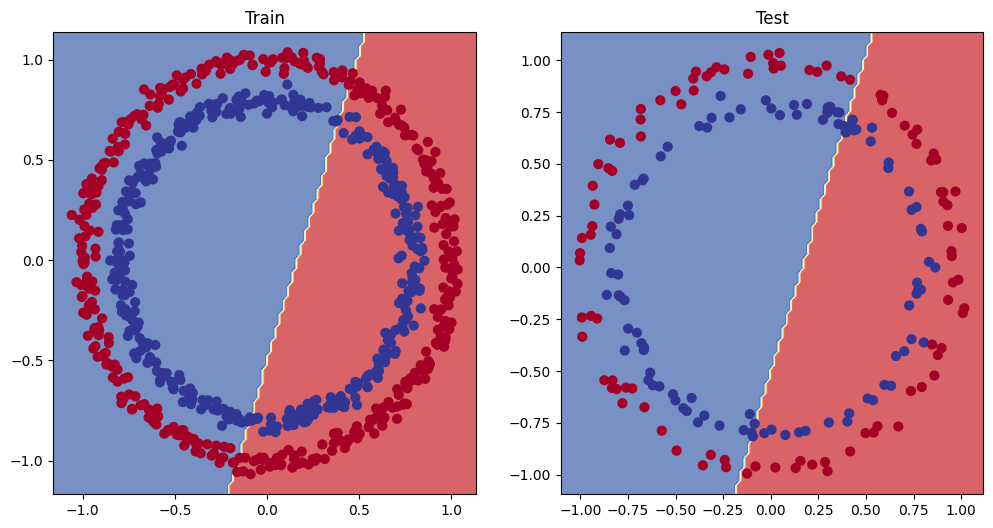

In [28]:
# Plot decision boundar of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0 , X_train , y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0 , X_test , y_test)

## 5. Improving a model (from a model  perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* change the loss function

 These options are all from the model's perspective because thay deal directly with the model, rather than the data.

 And because these options are all values we (as machine learning engineers and  data scientists) can change , they are referred as **hyperparameter**


 Let's try and improve our model by :
 * Adding more hidden units: 5-> 10
 * Increase the number of layers: 2-> 3
 * Increase the number of epochs: 100 -> 1000

In [29]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1  = nn.Linear(in_features=2 , out_features=10)
    self.layer_2 = nn.Linear(in_features=10 , out_features=10)
    self.layer_3 = nn.Linear(in_features=10 , out_features=1)


  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1  = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [30]:
# Create a loss function

loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)



In [31]:
# Write a train and testing loop for model_1
torch.manual_seed(42)

epochs  = 1000

X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

# Training loop
for epoch in range(epochs):
  model_1.train()

  # forward pass
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # Calculate the loss/acc
  loss = loss_fn(y_logits , y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_preds=y_preds)

  # Optimizer Zero grad
  optimizer.zero_grad()

  # loss backward
  loss.backward()

  # optimizer step
  optimizer.step()


   ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1 . Forward pass

    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_preds=test_pred)

    # Print out whats happening
    if epoch % 10 == 0:
      print(f"Epoch : {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} , Test Acc: {test_acc:.2f}% " )


Epoch : 0 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.69261 , Test Acc: 51.00% 
Epoch : 10 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.69261 , Test Acc: 51.00% 
Epoch : 20 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.69261 , Test Acc: 51.00% 
Epoch : 30 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.69261 , Test Acc: 51.00% 
Epoch : 40 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.69261 , Test Acc: 51.00% 
Epoch : 50 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.69261 , Test Acc: 51.00% 
Epoch : 60 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.69261 , Test Acc: 51.00% 
Epoch : 70 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.69261 , Test Acc: 51.00% 
Epoch : 80 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.69261 , Test Acc: 51.00% 
Epoch : 90 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.69261 , Test Acc: 51.00% 
Epoch : 100 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.69261 , Test Acc: 51.00% 
Epoch : 110 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.69261 , Test Acc: 51.00% 
Epoch : 120 | L

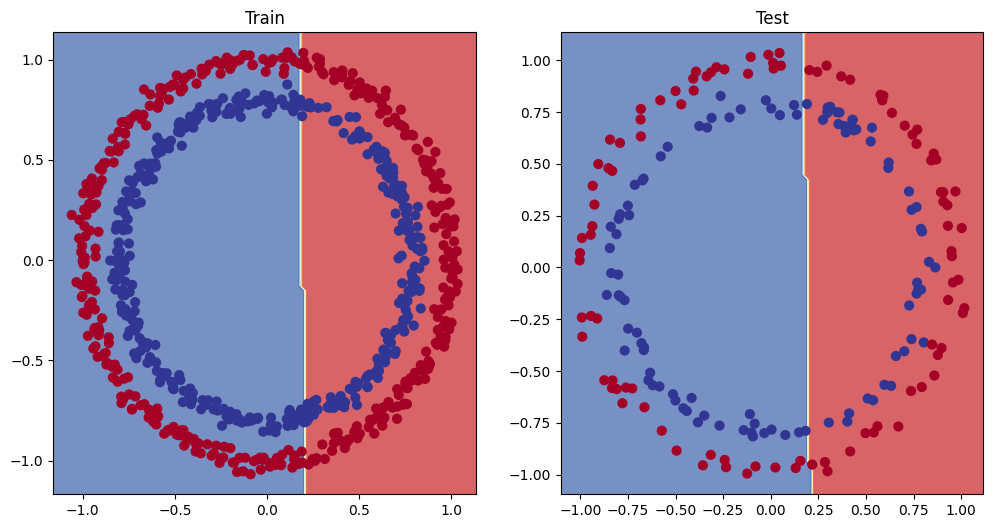

In [32]:
# Plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1 , X_train , y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1 , X_test , y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to trubleshoot to a larger problem is that to test out a smaller problem


In [ ]:
# Create a some data
weight = 0.7
bias =0.3
start = 0
end = 1
step = 0.01

# Create Data
X_regression = torch.arange(start , end , step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# check the data
print(X_regression)
X_regression[:4] , y_regression[:5]

In [34]:
# Create train and test split

train_split = int(0.8 * len(X_regression))
X_train_regression , y_train_regression = X_regression[:train_split] , y_regression[:train_split]
X_test_regression , y_test_regression =  X_regression[train_split:] , y_regression[train_split:]

# Check the len of each
len(X_train_regression) , len(X_test_regression) , len(y_train_regression) , len(y_test_regression)




(80, 20, 80, 20)

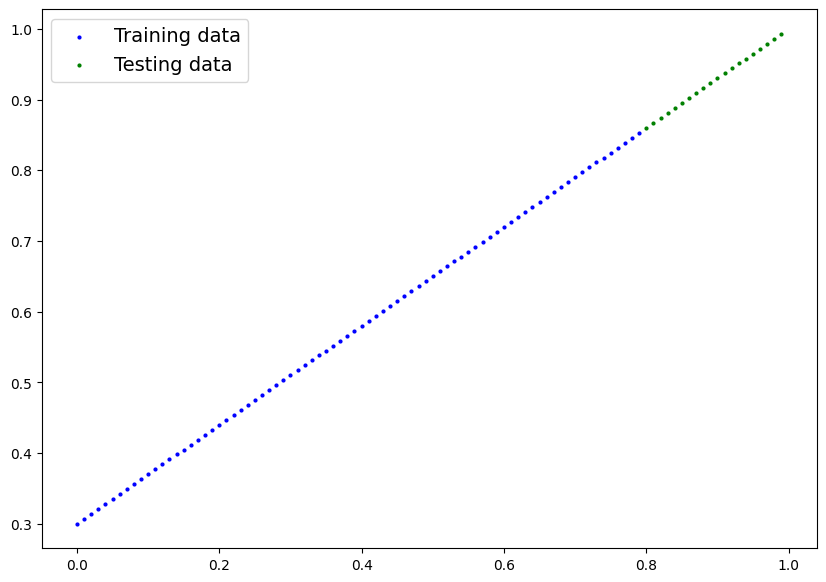

In [35]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line

In [36]:
# Same architecture as model_1 but using nn.Sequential()

model_2 = nn.Sequential(
    nn.Linear(in_features=1 , out_features=10),
    nn.Linear(in_features=10 , out_features=10),
    nn.Linear(in_features=10 , out_features=1)

).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [37]:
# loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                      lr=0.001)

In [38]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
X_train_regression , y_train_regression = X_train_regression.to(device) , y_train_regression.to(device)
X_test_regression , y_test_regression = X_test_regression.to(device) , y_test_regression.to(device)

for epoch in range(epochs):
  model_2.train()

  # forward pass
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred , y_test_regression)

  # print out what's happening
  if epoch % 100 ==0:
    print(f"Epoch : {epoch} | Loss: {loss:.5f} | test Loss: {test_loss:.5f}")


Epoch : 0 | Loss: 0.75986 | test Loss: 0.94965
Epoch : 100 | Loss: 0.40272 | test Loss: 0.54029
Epoch : 200 | Loss: 0.05876 | test Loss: 0.13480
Epoch : 300 | Loss: 0.01461 | test Loss: 0.03342
Epoch : 400 | Loss: 0.00308 | test Loss: 0.00008
Epoch : 500 | Loss: 0.00309 | test Loss: 0.00012
Epoch : 600 | Loss: 0.00309 | test Loss: 0.00018
Epoch : 700 | Loss: 0.00299 | test Loss: 0.00011
Epoch : 800 | Loss: 0.00299 | test Loss: 0.00016
Epoch : 900 | Loss: 0.00289 | test Loss: 0.00011


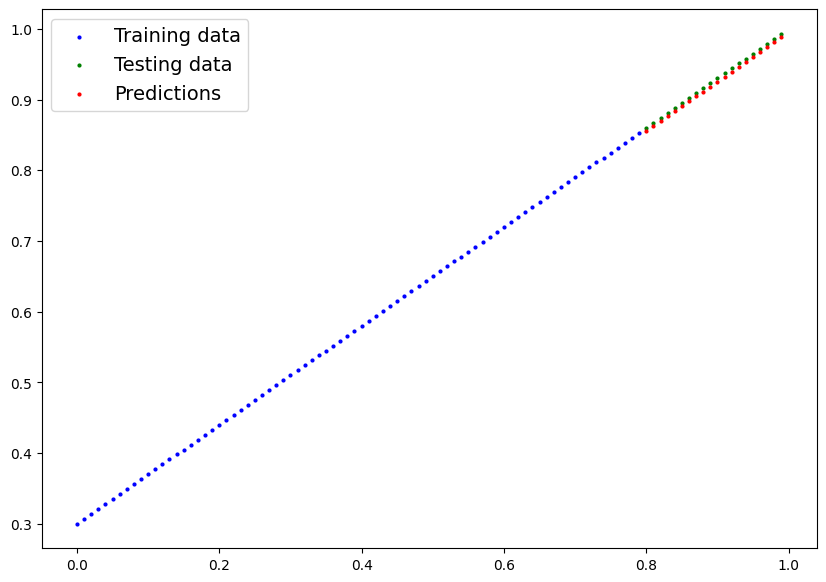

In [39]:
# Turn on evaluation mode
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression , train_labels = y_train_regression,
                 test_data=X_test_regression , test_labels=y_test_regression,
                 predictions=y_preds)

### 6 The missing piece : Non-linearity

"What patterns could you draw if you given an infinite of a straight and non-straight lines ?"

Or in the Machine Learning Terms, an infinite (but really it is finite) linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circle)



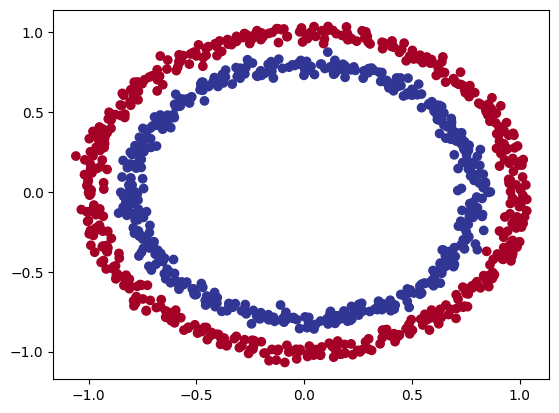

In [40]:
# Make and plot the data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


In [41]:
# Convert data to tensor and then train test split

import torch
from sklearn.model_selection import train_test_split

# turn the data into tensor

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


# train and test split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

X_train[:5] , y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearrity

* Linear - Straight Line
* Non-linear -  non-straight line

Aritficial neural Networks are a large combination of linear (Straight) and non-linear(non-straight) functions which are potentially able to find patterns in data

In [42]:
# Build a model with non-linear activation function

from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2 ,out_features=10)
    self.layer_2 = nn.Linear(in_features=10 , out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [43]:
# LOss and ooptimizer

loss_fn = nn.BCEWithLogitsLoss()  # Binary Cross Entropy
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.01)

In [68]:
# Traning and testing loop with non-linearity

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

# Creatign the loop
for epoch in range(epochs):
  model_3.train()

  # forward pass
  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))  # logits -> prediction prob- > prediction labels


  # loss function
  loss = loss_fn(y_logits , y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_preds=y_preds)

  # optimizer
  optimizer.zero_grad()

  # bacward loss
  loss.backward()

  # optimizer step
  optimizer.step()

  ## Testing Loop
  model_3.eval()

  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits ,y_test)
    test_Acc = accuracy_fn(y_true=y_test,
                           y_preds=test_pred)

 # print out what's happening
  if epoch % 100 ==0:
    print(f"Epoch : {epoch} | Loss: {loss:.4f} , Acc: {acc:.2f}% | test Loss: {test_loss:.5f} , Test acc : {test_acc:.2f}%")




Epoch : 0 | Loss: 0.6869 , Acc: 15.00% | test Loss: 0.68619 , Test acc : 100.00%
Epoch : 100 | Loss: 0.6869 , Acc: 15.00% | test Loss: 0.68619 , Test acc : 100.00%
Epoch : 200 | Loss: 0.6869 , Acc: 15.00% | test Loss: 0.68619 , Test acc : 100.00%
Epoch : 300 | Loss: 0.6869 , Acc: 15.00% | test Loss: 0.68619 , Test acc : 100.00%
Epoch : 400 | Loss: 0.6869 , Acc: 15.00% | test Loss: 0.68619 , Test acc : 100.00%
Epoch : 500 | Loss: 0.6869 , Acc: 15.00% | test Loss: 0.68619 , Test acc : 100.00%
Epoch : 600 | Loss: 0.6869 , Acc: 15.00% | test Loss: 0.68619 , Test acc : 100.00%
Epoch : 700 | Loss: 0.6869 , Acc: 15.00% | test Loss: 0.68619 , Test acc : 100.00%
Epoch : 800 | Loss: 0.6869 , Acc: 15.00% | test Loss: 0.68619 , Test acc : 100.00%
Epoch : 900 | Loss: 0.6869 , Acc: 15.00% | test Loss: 0.68619 , Test acc : 100.00%


### 6.4 Evaluating a model trained with non-linear activation functions


In [66]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10] , y_test[:10]

(tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 tensor([ 1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.]))

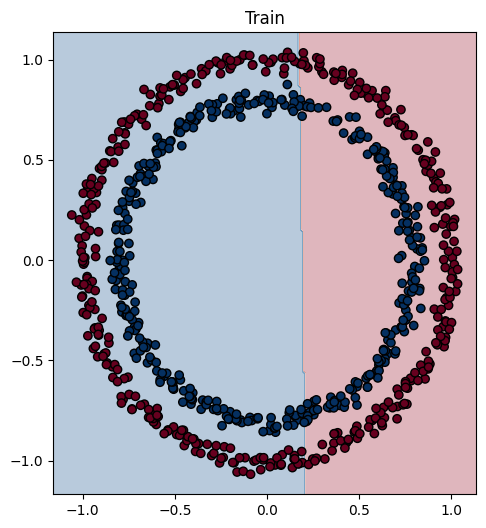

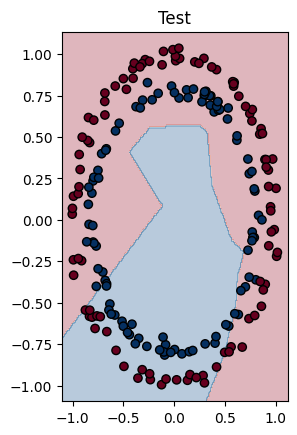

In [67]:
# Plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1 , X_train , y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3 , X_test , y_test)

### 7 Replicating non-linear activation functions

Neural Network, rather that us telling the model what to learn, we give it the tools to discover patterns in the data and it tries to figure out the patterns on its own

And these tools are linear and non-linear tools

In [47]:
# Create a tensor
A = torch.arange(-10 , 10 , 1 , dtype=torch.float32)
A.dtype

torch.float32

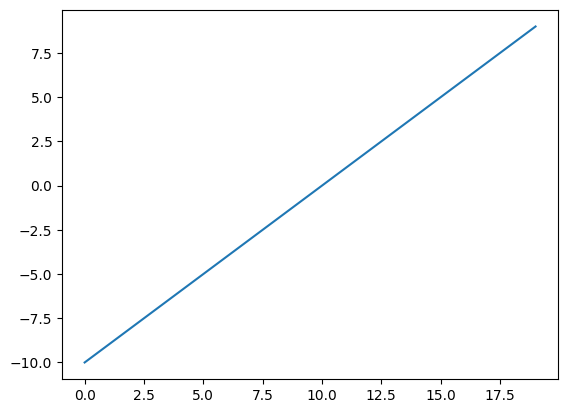

In [48]:
# Visualize this tensor
plt.plot(A)

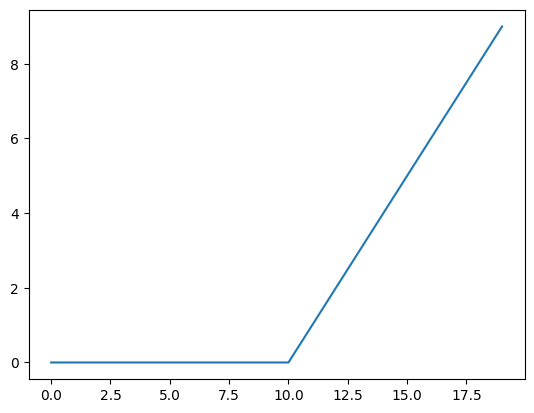

In [49]:
plt.plot(torch.relu(A))

In [50]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0) , x) # inputs must be tensors
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

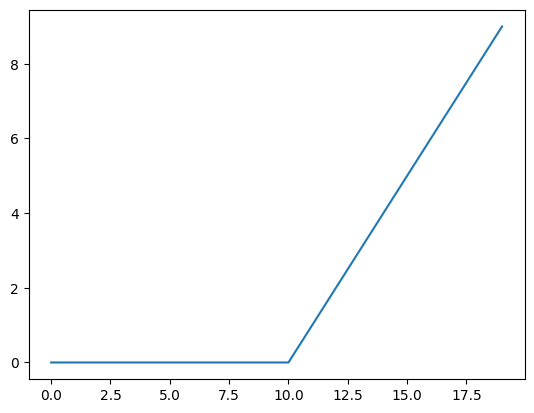

In [51]:
# plot the relu activation function
plt.plot(relu(A))

In [52]:
# Let's do by sigmoid

def sigmoid(x):
  return 1 / (1 + torch.exp(-x))


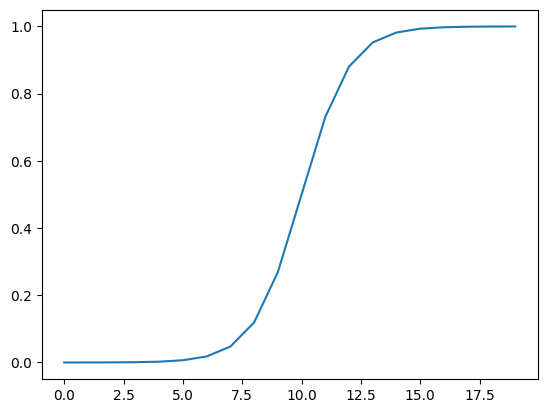

In [53]:
plt.plot(torch.sigmoid(A))

### 8. Putting it all together with a multi-class classification problem

* Binary Classification = one thing or anoter (cat vs dog , spam vs not span , fraud vs not fraud)

* Multii-class classification = more than one thing or another (cat vs dog vs chicken )

### 8.1 Creating a toy multi-class dataset

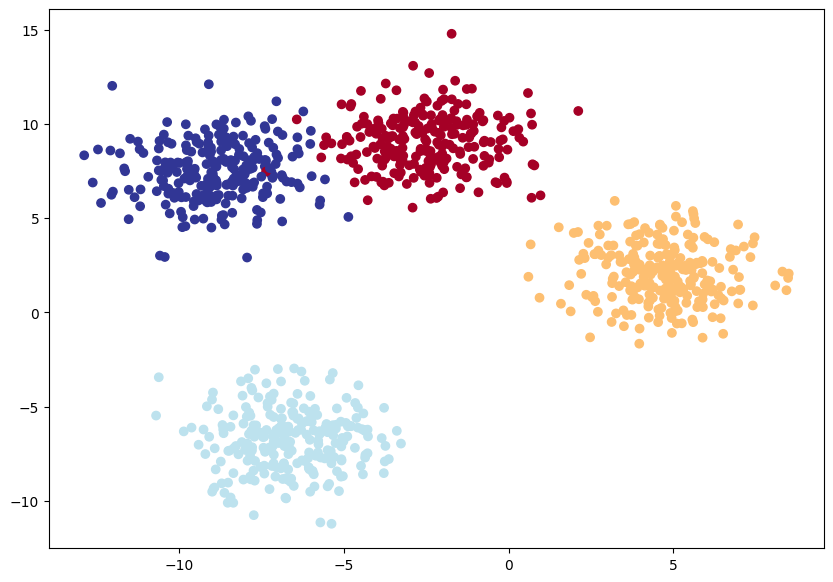

In [151]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Setup the hyperparameters for the data creation

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob , y_blob = make_blobs(n_samples=1000,
                             n_features=NUM_FEATURES,
                             centers=NUM_CLASSES,
                             cluster_std=1.5,
                             random_state=RANDOM_SEED)

# 2. Turn the data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3 Split into train and test
X_blob_train , X_blob_test , y_blob_train , y_blob_test = train_test_split(X_blob,
                                                                           y_blob ,
                                                                           test_size=0.2 ,
                                                                           random_state=RANDOM_SEED)

# 4 Plot the data visuals
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0] , X_blob[:, 1] , c=y_blob , cmap=plt.cm.RdYlBu)


### 8.2 Building a Multi-class Classification model in PyTorch


In [152]:
# Create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [168]:
# Build a multi class classification model
class BlobModel(nn.Module):
  def __init__(self , input_features , output_features  , hidden_units=8):
    """Initializes multi-class classificational model.
    Args:
      Input_features (int): Number of input features to the model
      output_features (int): Numer of outout features (number of output classes)
      hidden_units (int): Number of hidden units between layers , default 8
    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features , out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units , out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units , out_features=output_features)
    )

  def forward(self ,x):
    return self.linear_layer_stack(x)

# Create an intance of BlobModel and send it to the target device
model_4  = BlobModel(input_features=2,
                     output_features=4,
                     hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [169]:
# Creating a Loss functiona and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer  = torch.optim.SGD(params=model_4.parameters(),
                             lr=0.1) # learing rate is hyperparameter that you can change

### 8.4 Getting prediction probabilitis for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to predictions probabilities and then to prediction lables.

`Logits ->(raw output of the model) Pred prob(use torch.softmax) -> pred labels (take the argmax of the prediction probabilities)`

In [170]:
# Let's get some raw output of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]


tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In [171]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [172]:
# Convert our model's logits outputs to prediction probabilities
y_pred_prob = torch.softmax(y_logits , dim=1)
print(y_logits[:5])
print(y_pred_prob[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


In [173]:
torch.argmax(y_pred_prob[0])

tensor(3)

In [174]:
# Convert our model's prediction probabilities to prediction labels
y_pred = torch.argmax(y_pred_prob , dim=1)
y_pred

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [175]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Create a traing and test loop for a multi-class PyTorch model

In [176]:
y_blob_train.dtype

torch.int64

In [177]:
# Creating training and testing loop for a multi-class model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train , y_blob_train = X_blob_train.to(device) , y_blob_train.to(device)
X_blob_test , y_blob_test  = X_blob_test.to(device) , y_blob_test.to(device)

# loop
for epoch in range(epochs):
  #Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits , dim=1).argmax(dim=1)

  loss = loss_fn(y_logits ,y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_preds = y_pred)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  ###Tesing the data
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits , dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits , y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_preds=test_preds)

  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss : {loss:.4f} , Acc: {acc:.2f}% | Test Loss : {test_loss:.4f} , Test Acc : {test_acc:.2f}%")





Epoch: 0 | Loss : 1.0432 , Acc: 65.50% | Test Loss : 0.5786 , Test Acc : 95.50%
Epoch: 10 | Loss : 0.1440 , Acc: 99.12% | Test Loss : 0.1304 , Test Acc : 99.00%
Epoch: 20 | Loss : 0.0806 , Acc: 99.12% | Test Loss : 0.0722 , Test Acc : 99.50%
Epoch: 30 | Loss : 0.0592 , Acc: 99.12% | Test Loss : 0.0513 , Test Acc : 99.50%
Epoch: 40 | Loss : 0.0489 , Acc: 99.00% | Test Loss : 0.0410 , Test Acc : 99.50%
Epoch: 50 | Loss : 0.0429 , Acc: 99.00% | Test Loss : 0.0349 , Test Acc : 99.50%
Epoch: 60 | Loss : 0.0391 , Acc: 99.00% | Test Loss : 0.0308 , Test Acc : 99.50%
Epoch: 70 | Loss : 0.0364 , Acc: 99.00% | Test Loss : 0.0280 , Test Acc : 99.50%
Epoch: 80 | Loss : 0.0345 , Acc: 99.00% | Test Loss : 0.0259 , Test Acc : 99.50%
Epoch: 90 | Loss : 0.0330 , Acc: 99.12% | Test Loss : 0.0242 , Test Acc : 99.50%


In [178]:
# make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]


tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

In [179]:
# Go from logits -> prediction prob
y_pred_probs = torch.softmax(y_logits , dim=1)
y_pred_probs[:10]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3697e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2266e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5435e-08, 4.7619e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4287e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8303e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0767e-09, 2.0006e-04]])

In [180]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [181]:
# Go from pred probs to pred lables

y_pred = torch.argmax(y_pred_probs , dim=1)
y_pred

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

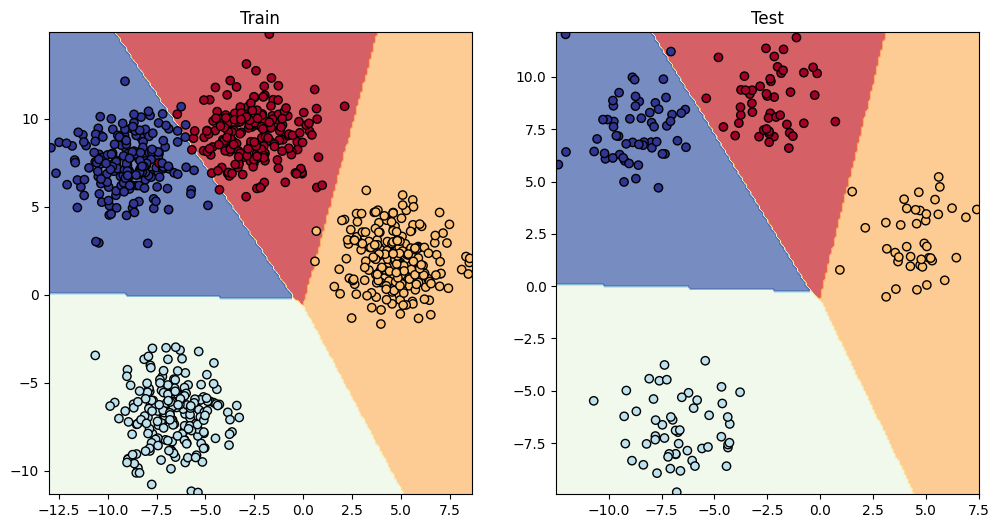

In [182]:
# Plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4 , X_blob_train , y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4 , X_blob_test , y_blob_test)

## 9. A few more classification metrics.. (to evaluate our classification model)

* Accuracy - out of 100 sample , how many does our model get right ?
* Precision
* F1-Score
* Confusion metrix
* Classification report



In [189]:
# from torchmetrics import Accuracy

# Setup metrics

# torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# # Calculate the accuracy
# torchmetrics_accuracy(y_preds , y_blob_test)

tensor(0.5150)

### Here We are integrating SVM + nn.module

To tackel the same accuracy improvement problem

Epoch 0 | Loss: 0.9961 | Train Acc: 50.00% | Test Acc: 50.00%
Epoch 20 | Loss: 0.9388 | Train Acc: 55.87% | Test Acc: 56.50%
Epoch 40 | Loss: 0.7956 | Train Acc: 62.00% | Test Acc: 64.00%
Epoch 60 | Loss: 0.4469 | Train Acc: 85.25% | Test Acc: 83.50%
Epoch 80 | Loss: 0.1632 | Train Acc: 97.25% | Test Acc: 97.00%
Epoch 100 | Loss: 0.0335 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 120 | Loss: 0.0177 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 140 | Loss: 0.0124 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 160 | Loss: 0.0100 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 180 | Loss: 0.0087 | Train Acc: 100.00% | Test Acc: 100.00%


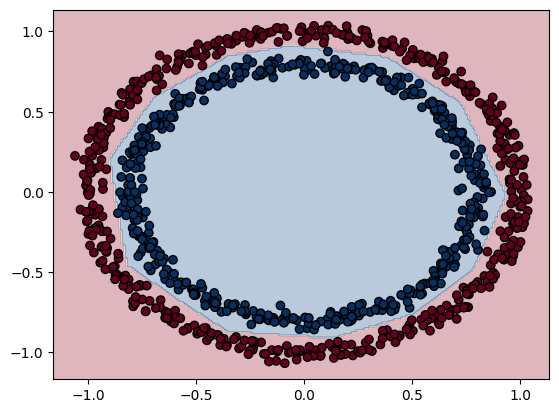

In [54]:
# =========================
# 1. Import Libraries
# =========================
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# =========================
# 2. Create Dataset
# =========================
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float() * 2 - 1   # Convert to {-1, 1} for hinge loss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# =========================
# 3. Define NN + SVM Head
# =========================
class DeepSVM(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Linear(8, 8),
            nn.ReLU()
        )
        self.classifier = nn.Linear(8, 1)  # SVM head (no activation)

    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)  # raw scores

model = DeepSVM().to(device)

# =========================
# 4. Hinge Loss for SVM
# =========================
def hinge_loss(y_true, y_pred):
    return torch.mean(torch.clamp(1 - y_true * y_pred.squeeze(), min=0))

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# =========================
# 5. Training Loop
# =========================
epochs = 200
for epoch in range(epochs):
    model.train()
    scores = model(X_train)
    loss = hinge_loss(y_train, scores)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Accuracy
    with torch.inference_mode():
        train_preds = torch.sign(model(X_train).squeeze())
        train_acc = (train_preds == y_train).float().mean() * 100
        test_preds = torch.sign(model(X_test).squeeze())
        test_acc = (test_preds == y_test).float().mean() * 100

    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f} | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}%")

# =========================
# 6. Plot Decision Boundary
# =========================
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 200), torch.linspace(y_min, y_max, 200), indexing='ij')
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1).to(device)
    with torch.inference_mode():
        Z = torch.sign(model(grid)).cpu().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y.cpu(), cmap=plt.cm.RdBu, edgecolors="k")
    plt.show()

plot_decision_boundary(model, X, y)
